In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#print actual path to the repertory
import os
os.getcwd()

'/Users/pierreloviton/PycharmProjects/data-science/ISEP/Data Analysis/TP4&5'

# A- Interprétation d'un cercle de corrélation

## 1

## 2

# B- PCA sur les données iris

## 1

In [207]:
df = pd.read_csv('/Users/pierreloviton/PycharmProjects/data-science/ISEP/Data Analysis/TP4/iris.csv')

In [118]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [119]:
df.shape

(150, 5)

## 2

In [208]:
liste_attributs = df.columns.tolist()

## 3

In [209]:
classe = liste_attributs[-1]

In [210]:
classe

'Class'

In [211]:
del(liste_attributs[-1])

In [212]:
liste_attributs

['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

## 4

In [213]:
#Normalize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[liste_attributs])

In [214]:
df_scaled = pd.DataFrame(df_scaled, columns = liste_attributs)

In [215]:
df_scaled.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## 5

In [216]:
pca = PCA(n_components=4)
#we initialiaze PCA to compute 4 components
data_proj1 = pca.fit_transform(df_scaled[liste_attributs])
#we project the data on the 4 new components (but we will display only 2)

In [217]:
print("Le pourcentage de variance expliquée de SepalLength est:",pca.explained_variance_ratio_[0]*100,"%")
print("Le pourcentage de variance expliquée de SepalWidth est:",pca.explained_variance_ratio_[1]*100,"%")

Le pourcentage de variance expliquée de SepalLength est: 72.77045209380135 %
Le pourcentage de variance expliquée de SepalWidth est: 23.030523267680632 %


In [218]:
data_proj = pd.DataFrame(data_proj, columns = liste_attributs)

In [219]:
data_proj = pd.concat([data_proj, df['Class']], axis=1)

In [222]:
data_proj.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,-2.264542,0.505704,-0.121943,-0.023073,setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,setosa
2,-2.367950,-0.318477,0.051480,-0.027825,setosa
3,-2.304197,-0.575368,0.098860,0.066311,setosa
4,-2.388777,0.674767,0.021428,0.037397,setosa


<AxesSubplot:xlabel='SepalLength', ylabel='SepalWidth'>

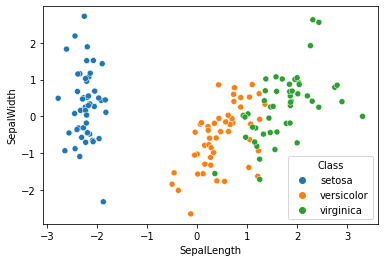

In [224]:
sns.scatterplot(x=data_proj['SepalLength'], y=data_proj['SepalWidth'], hue = data_proj['Class'])

## 6

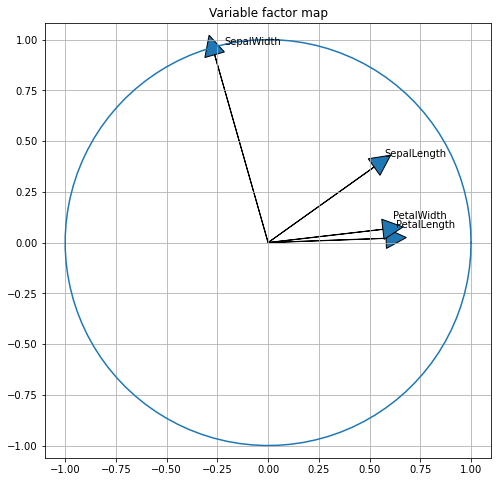

In [221]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
# For each feature, plot an arrow from the center of the circle and display his name
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
ax.grid()
plt.show()

# J'ai trouvé différentes aides sur Internet notamment : 
# http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_ACP_Python.pdf
# https://stackoverflow.com/questions/37815987/plot-a-correlation-circle-in-python

# C- Données golub : PCA vs MDS vs LLE vs Isomap vs t-SNE

## Partie 1

### 1

In [6]:
data = pd.read_csv('/Users/pierreloviton/PycharmProjects/data-science/ISEP/Data Analysis/TP4&5/golub.csv')

In [7]:
data.head()

,Ex 1,Ex 2,Ex 3,Ex 4,Ex 5,Ex 6,Ex 7,Ex 8,Ex 9,Ex 10,...,Ex 63,Ex 64,Ex 65,Ex 66,Ex 67,Ex 68,Ex 69,Ex 70,Ex 71,Ex 72
G 1,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,...,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
G 2,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,...,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
G 3,-58,-1,-307,265,-76,215,238,7,106,42,...,102,-82,-77,38,-21,-5,63,-46,-124,-81
G 4,88,283,309,12,168,71,55,-2,268,219,...,319,178,340,31,396,141,95,146,431,9
G 5,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,...,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294


In [141]:
data.shape

(7129, 72)

Quand on ouvre le fichier, il faut afficher la transposée de ce tableau pour avec les G en nom de colonne

In [8]:
data = data.T

In [9]:
data.head()

,G 1,G 2,G 3,G 4,G 5,G 6,G 7,G 8,G 9,G 10,...,G 7120,G 7121,G 7122,G 7123,G 7124,G 7125,G 7126,G 7127,G 7128,G 7129
Ex 1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
Ex 2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
Ex 3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
Ex 4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
Ex 5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


### 2

In [11]:
data_class = pd.read_csv('/Users/pierreloviton/PycharmProjects/data-science/ISEP/Data Analysis/TP4&5/golub_class.csv',header=None)


In [12]:
data_class.shape

(72, 2)

In [13]:
data_class = data_class.rename(columns={1: 'Class', })

In [14]:
data_class.head()

,0,Class
0,Ex1,ALL
1,Ex2,ALL
2,Ex3,ALL
3,Ex4,ALL
4,Ex5,ALL


### 3

In [15]:
#Normalize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)
data_scaled.head()

,G 1,G 2,G 3,G 4,G 5,G 6,G 7,G 8,G 9,G 10,...,G 7120,G 7121,G 7122,G 7123,G 7124,G 7125,G 7126,G 7127,G 7128,G 7129
0,-1.024310,0.074633,-0.409794,-0.912181,-0.343639,-1.084633,0.933013,0.148144,1.936296,0.477662,...,0.103263,-0.518375,-1.304810,0.019140,-0.064488,0.027771,0.122186,0.593119,-0.391378,-0.161117
1,-0.251570,0.912622,0.058021,0.842926,-0.088142,-0.025964,-0.938122,0.228796,0.235584,-0.107200,...,-0.067901,0.555431,-0.279396,0.160143,0.322438,0.003223,-0.043618,0.032103,-0.576990,0.415146
2,0.397532,1.164019,-2.453409,1.076941,-1.011228,-1.701073,0.345851,-1.777443,1.418198,-1.387695,...,1.493964,1.747818,0.515587,-0.568816,1.657332,0.797680,2.306901,0.705322,-0.331659,-0.261337
3,-0.210357,0.483153,2.241159,-1.596222,-1.365627,-1.265545,0.787991,-0.628140,-0.350091,-0.297724,...,0.691636,0.548844,2.647065,-0.552853,-1.476766,-0.342677,-0.653193,-1.336776,-0.496289,-1.514082
4,0.088436,0.367929,-0.557526,-0.192137,0.192081,0.751286,0.243275,0.692550,-0.113568,0.681478,...,-0.206971,-0.063819,0.792103,0.325090,0.148322,-1.183998,0.049037,0.099424,-0.609271,0.139542


In [193]:
pca = PCA(n_components=2)
#we initialiaze PCA
data_proj2 = pca.fit_transform(data_scaled)
#we project the data on the 2 new components

In [194]:
data_proj2 = pd.DataFrame(data_proj2)
data_proj2 = pd.concat([data_proj2, data_class['Class']], axis=1)

In [195]:
data_proj2.shape

(72, 3)

In [196]:
data_proj2.head()

,0,1,Class
0,27.105207,6.448462,ALL
1,3.507420,15.845777,ALL
2,60.006379,10.392313,ALL
3,20.640386,-2.623369,ALL
4,-21.012018,41.794152,ALL


<AxesSubplot:xlabel='0', ylabel='1'>

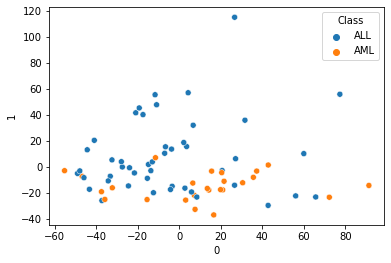

In [197]:
sns.scatterplot(x=data_proj2[0],y=data_proj2[1],hue = data_proj2['Class'])

Après avoir fait une ACP, nous obtenons le graphe suivant. Nous ne pouvons pas distinguer
les clusters dans notre jeu de données. En effet, les variantes de leucémie AML (25) et ALL (47)
sont complètement mélangées.

### 4

In [154]:
from sklearn.manifold import MDS

In [200]:
# we initialiaze MDS
mds = MDS(n_components = 2, random_state=0)
# we project the data on the 2 new components
data_proj3 = mds.fit_transform(data_scaled)

In [202]:
data_proj3 = pd.DataFrame(data_proj3)
data_proj3 = pd.concat([data_proj3, data_class['Class']], axis=1)

<AxesSubplot:xlabel='0', ylabel='1'>

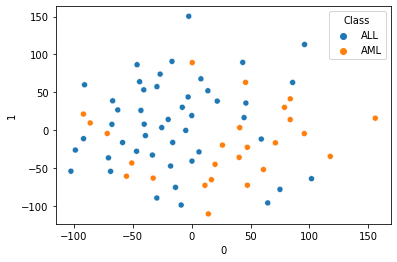

In [203]:
sns.scatterplot(x=data_proj3[0],y=data_proj3[1],hue = data_proj3['Class'])

### 5

## Partie 2

### 1 - Isomap

In [34]:
from sklearn.manifold import Isomap, LocallyLinearEmbedding, TSNE

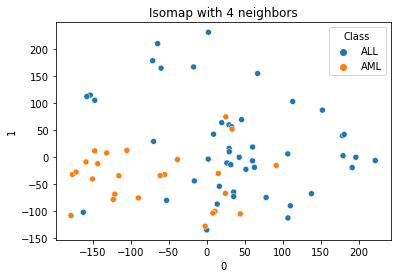

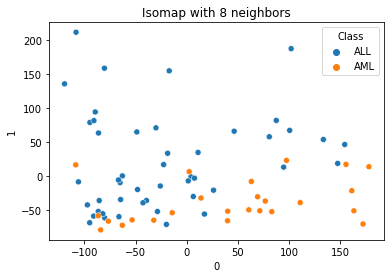

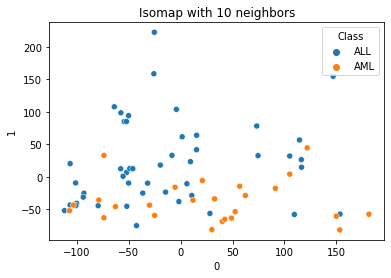

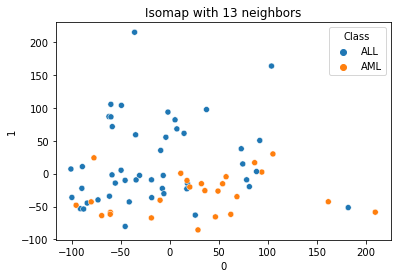

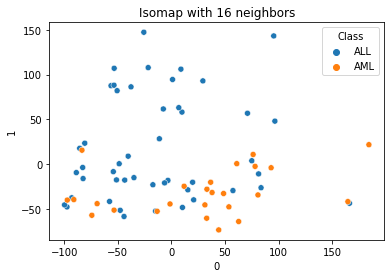

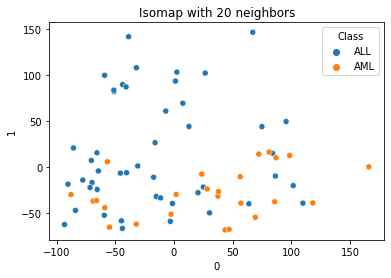

In [30]:
# We take normalized dataset
list = [4,8,10,13,16,20]

for i in list:
    isomap = Isomap(n_neighbors = i)
    data_proj4 = isomap.fit_transform(data_scaled)
    data_proj4 = pd.DataFrame(data_proj4)
    data_proj4 = pd.concat([data_proj4, data_class['Class']], axis=1)
    fig, ax = plt.subplots()
    sns.scatterplot(x = data_proj4[0], y=data_proj4[1],hue = data_proj4['Class'])
    ax.set_title('Isomap with '+ str(i) +' neighbors')

### 2- LocallyLinearEmbedding

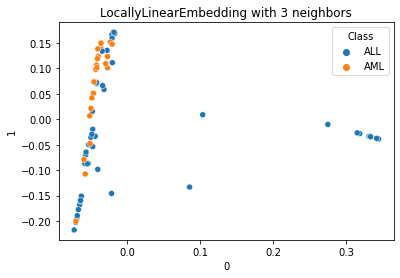

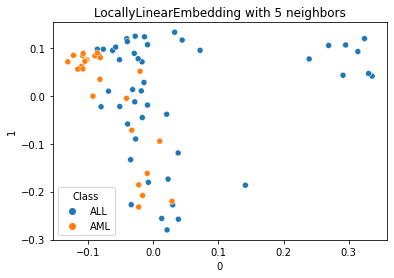

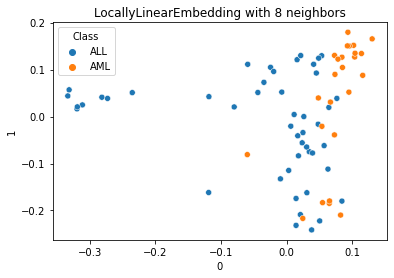

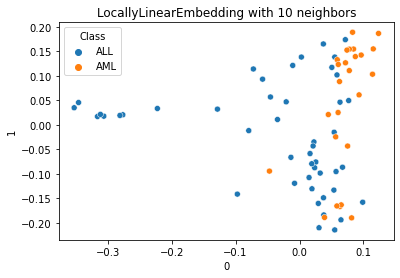

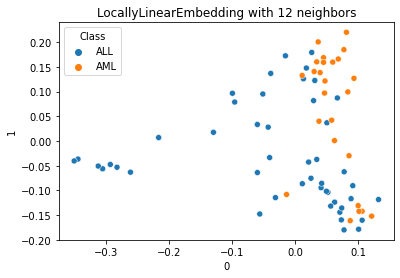

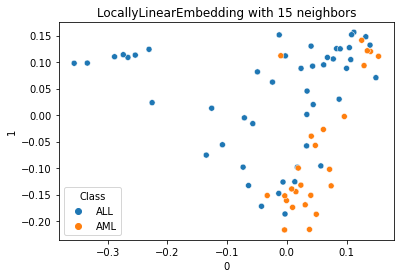

In [33]:
# We take normalized dataset
list = [3,5,8,10,12,15]

for i in list:
    lle = LocallyLinearEmbedding(n_neighbors = i)
    data_proj5 = lle.fit_transform(data_scaled)
    data_proj5 = pd.DataFrame(data_proj5)
    data_proj5 = pd.concat([data_proj5, data_class['Class']], axis=1)
    fig, ax = plt.subplots()
    sns.scatterplot(x = data_proj5[0], y=data_proj5[1],hue = data_proj5['Class'])
    ax.set_title('LocallyLinearEmbedding with '+ str(i) +' neighbors')


### 3- TSNE

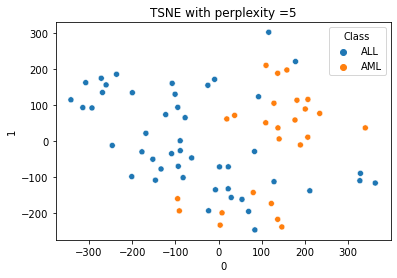

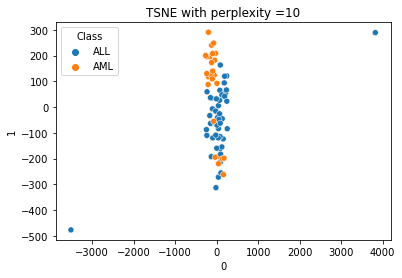

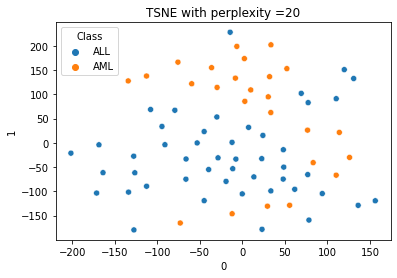

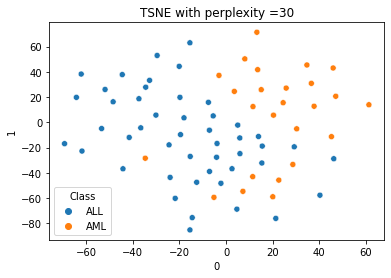

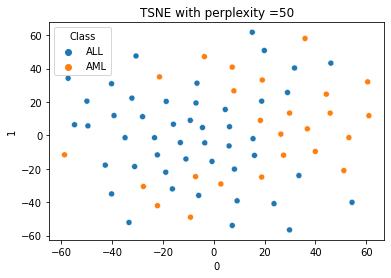

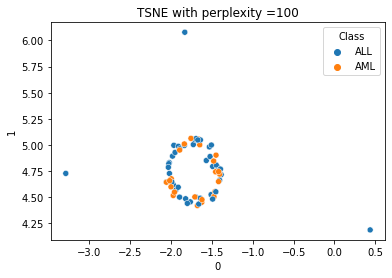

In [75]:
# We take normalized dataset
list = [5,10,20,30,50,100]

for i in list:
    tsne = TSNE(n_components=2,perplexity = i)
    data_proj6 = tsne.fit_transform(data_scaled)
    data_proj6 = pd.DataFrame(data_proj6)
    data_proj6 = pd.concat([data_proj6, data_class['Class']], axis=1)
    fig, ax = plt.subplots()
    sns.scatterplot(x = data_proj6[0], y=data_proj6[1],hue = data_proj6['Class'])
    ax.set_title('TSNE with perplexity ='+str(i))

### 4

# D- Données Digits : PCA vs t-SNE

## 1

In [109]:
from sklearn import datasets
load_digits = datasets.load_digits()
digits = pd.DataFrame(load_digits.data, columns = load_digits.feature_names)
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [111]:
target = load_digits.target
target

array([0, 1, 2, ..., 8, 9, 8])

## 2

In [112]:
#Normalize data
scaler = StandardScaler()
digits_scaled = scaler.fit_transform(digits)
digits_scaled = pd.DataFrame(digits_scaled, columns = digits.columns)
digits_scaled.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008


In [113]:
pca = PCA(n_components=2)
#we initialiaze PCA
digits_proj = pca.fit_transform(digits_scaled)
#we project the data on the 2 new components

In [115]:
digits_proj = pd.DataFrame(digits_proj)
digits_proj['number'] = target

In [116]:
digits_proj.head()

,0,1,number
0,1.914221,-0.954427,0
1,0.589003,0.924775,1
2,1.302005,-0.317397,2
3,-3.020774,-0.868813,3
4,4.528923,-1.093649,4


In [118]:
digits_proj.shape

(1797, 3)

<AxesSubplot:xlabel='0', ylabel='1'>

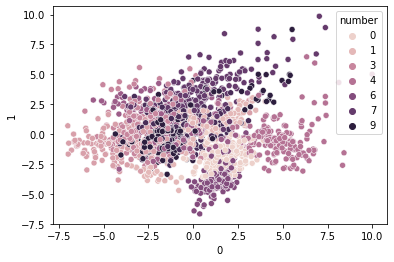

In [120]:
sns.scatterplot(x=digits_proj[0],y=digits_proj[1],hue = digits_proj['number'])

## 3

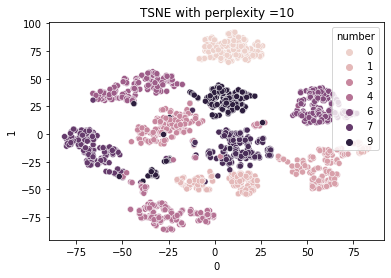

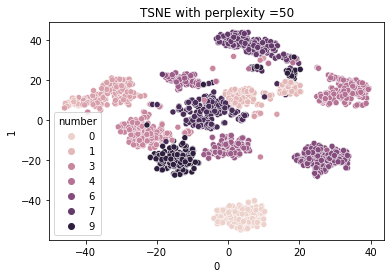

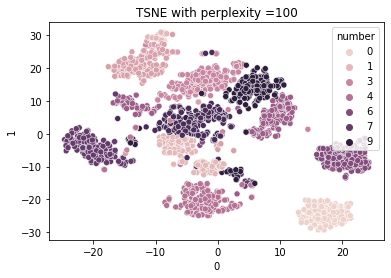

In [123]:
# We take normalized dataset
list = [10,50,100]

for i in list:
    tsne_digits = TSNE(n_components=2,perplexity = i)
    digits_proj2 = tsne_digits.fit_transform(digits_scaled)
    digits_proj2 = pd.DataFrame(digits_proj2)
    digits_proj2['number'] = target
    fig, ax = plt.subplots()
    sns.scatterplot(x = digits_proj2[0], y=digits_proj2[1],hue = digits_proj2['number'])
    ax.set_title('TSNE with perplexity ='+str(i))

On peut voir que le PCA essaie effectivement de garder la structure globale du jeu de données, tandis que le TSNE tente de préserver la structure local (les culsters) du jeu de données.
Cela se traduit sur les graphiques que l'on obtient par des clusters bien plus précis sur chaque nombre que l'on a, avec le TSNE. Chaque cluster est plus dense et plus séparé qu'avec un PCA. Le TSNE est donc bien plus adequat ici que le PCA.

# E- Données Alon

In [134]:
alon = pd.read_csv('/Users/pierreloviton/PycharmProjects/data-science/ISEP/Data Analysis/TP4&5/alon.csv', sep=';')

In [146]:
alon_class = pd.read_csv('/Users/pierreloviton/PycharmProjects/data-science/ISEP/Data Analysis/TP4&5/alon_class.csv', sep=';')

In [148]:
alon_class.head()

,x
0,t
1,n
2,t
3,n
4,t


In [139]:
alon.head()

,Hsa.3004,Hsa.13491,Hsa.13491.1,Hsa.37254,Hsa.541,Hsa.20836,Hsa.1977,Hsa.44472,Hsa.3087,Hsa.1447,...,Hsa.2618,Hsa.27285,Hsa.41260,Hsa.14822,Hsa.336,Hsa.984,Hsa.35124,Hsa.3952,Hsa.32734,Hsa.9683
0,15.161878,9.437886,7.228324,6.864347,3.073544,9.096942,3.388666,4.495803,13.212367,7.859688,...,-0.408666,-0.466526,-0.113772,-0.335694,-0.428619,-0.517674,-0.466031,-0.451634,-0.437257,-0.537792
1,13.131232,9.450446,6.686033,4.931565,2.367608,7.719571,5.128649,3.539225,9.899418,6.563777,...,-0.475624,-0.527643,-0.521560,-0.439791,-0.542699,-0.538498,-0.437367,-0.385619,-0.599566,-0.641271
2,4.658592,8.748834,6.667209,5.803129,1.199826,1.727416,1.406442,1.597463,3.970835,3.306997,...,-0.119953,-0.209910,-0.277052,-0.065272,-0.217389,-0.025341,-0.276883,-0.262016,-0.296575,-0.297785
3,10.563792,13.364874,10.047634,6.530421,3.026227,3.253446,2.188840,2.514740,6.342561,8.331140,...,-0.259611,-0.456618,-0.520114,-0.205599,-0.398273,-0.410386,-0.444789,-0.455126,-0.441876,-0.502069
4,7.022636,8.122147,7.426341,7.575234,4.537741,6.294042,4.272008,6.355163,7.195669,6.736173,...,-0.330511,-0.448630,-0.247855,-0.483929,-0.500843,-0.100952,-0.456922,-0.493642,-0.612353,-0.554739


In [128]:
alon.shape

(62, 2000)

## 1- PCA

In [140]:
#Normalize data
scaler = StandardScaler()
alon_scaled = scaler.fit_transform(alon)
alon_scaled = pd.DataFrame(alon_scaled, columns = alon.columns)
alon_scaled.head()

,Hsa.3004,Hsa.13491,Hsa.13491.1,Hsa.37254,Hsa.541,Hsa.20836,Hsa.1977,Hsa.44472,Hsa.3087,Hsa.1447,...,Hsa.2618,Hsa.27285,Hsa.41260,Hsa.14822,Hsa.336,Hsa.984,Hsa.35124,Hsa.3952,Hsa.32734,Hsa.9683
0,1.920596,0.841284,0.606893,0.545878,-0.546500,0.954281,-0.846262,0.271259,2.514398,0.978972,...,-0.657739,-0.028745,0.272129,0.934423,-0.068243,-0.826202,0.366024,-0.010992,1.352178,0.122453
1,1.132984,0.846061,0.366317,-0.290260,-0.933854,0.423243,0.137182,-0.282909,1.250262,0.410459,...,-1.233479,-0.701265,-1.675468,-0.078768,-1.330012,-0.922532,0.696934,0.789640,-0.799475,-0.944680
2,-2.153239,0.579205,0.357966,0.086786,-1.574625,-1.887001,-1.966622,-1.407818,-1.011932,-1.018282,...,1.824736,2.795008,-0.507696,3.566485,2.268039,1.451241,2.549643,2.288703,3.217119,2.597535
3,0.137169,2.334900,1.857621,0.401419,-0.572463,-1.298648,-1.524408,-0.876417,-0.106943,1.185797,...,0.623898,0.080278,-1.668562,2.200657,0.267397,-0.329907,0.611247,-0.053340,1.290935,0.490847
4,-1.236314,0.340847,0.694739,0.853414,0.256918,-0.126362,-0.346995,1.348430,0.218581,0.486089,...,0.014273,0.168177,-0.368254,-0.508367,-0.867073,1.101477,0.471183,-0.520454,-0.968994,-0.052311


In [141]:
pca = PCA(n_components=2)
#we initialiaze PCA
alon_proj_pca = pca.fit_transform(alon_scaled)
#we project the data on the 2 new components

In [149]:
alon_proj_pca = pd.DataFrame(alon_proj_pca)
alon_proj_pca['x']=alon_class['x']

In [150]:
alon_proj_pca.head()

,0,1,x
0,13.902988,-13.244872,t
1,-10.279464,-23.636561,n
2,66.293096,-11.884993,t
3,28.661505,-27.168594,n
4,0.479417,11.619696,t


In [151]:
alon_proj_pca.shape

(62, 3)

<AxesSubplot:xlabel='0', ylabel='1'>

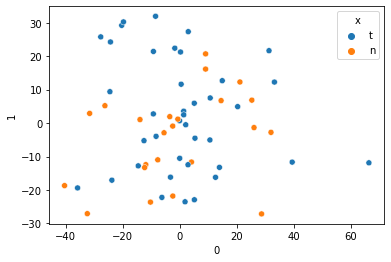

In [152]:
sns.scatterplot(x=alon_proj_pca[0],y=alon_proj_pca[1], hue = alon_proj_pca['x'])

## 2- MDS

In [155]:
# we initialiaze MDS
mds = MDS(n_components = 2, random_state=0)
# we project the data on the 2 new components
alon_proj_mds = mds.fit_transform(alon_scaled)

In [156]:
alon_proj_mds = pd.DataFrame(alon_proj_mds)
alon_proj_mds['x']=alon_class['x']

In [158]:
alon_proj_mds.head()

,0,1,x
0,-1.712204,-29.829652,t
1,-38.757173,-7.116123,n
2,33.820790,-74.039105,t
3,-3.995350,-50.998802,n
4,24.871249,6.481592,t


In [157]:
alon_proj_mds.shape

(62, 3)

<AxesSubplot:xlabel='0', ylabel='1'>

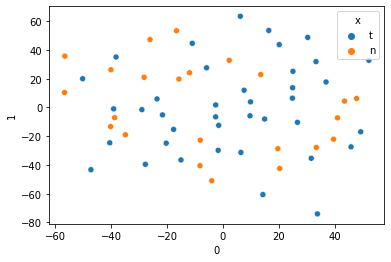

In [159]:
sns.scatterplot(x=alon_proj_mds[0],y=alon_proj_mds[1], hue = alon_proj_mds['x'])

## 3- Isomap

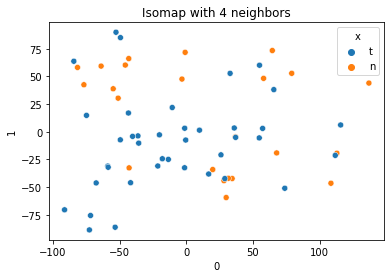

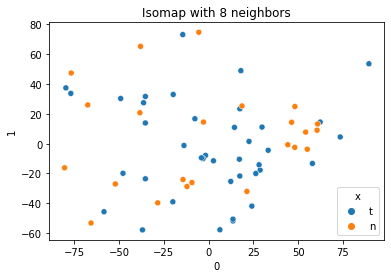

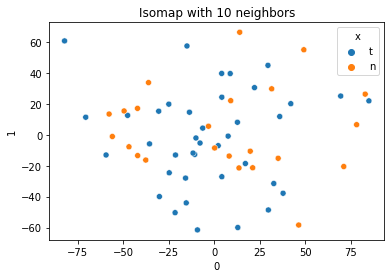

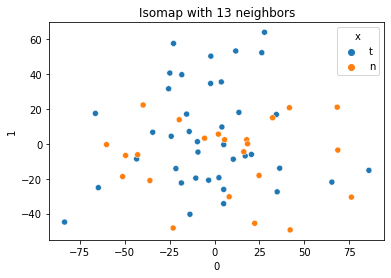

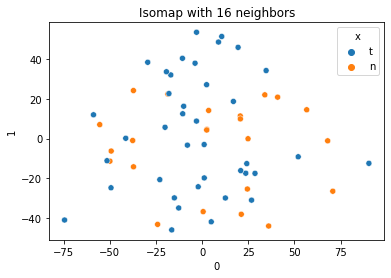

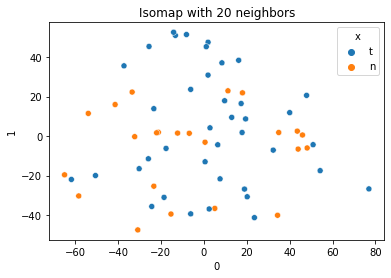

In [160]:
# We take normalized dataset
list = [4,8,10,13,16,20]

for i in list:
    isomap = Isomap(n_neighbors = i)
    alon_proj_isomap = isomap.fit_transform(alon_scaled)
    alon_proj_isomap = pd.DataFrame(alon_proj_isomap)
    alon_proj_isomap['x'] = alon_class['x']
    fig, ax = plt.subplots()
    sns.scatterplot(x = alon_proj_isomap[0], y= alon_proj_isomap[1],hue = alon_proj_isomap['x'])
    ax.set_title('Isomap with '+ str(i) +' neighbors')

## 4- LocallyLinearEmbedding

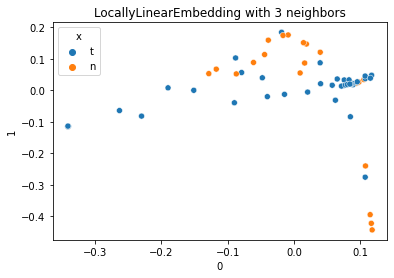

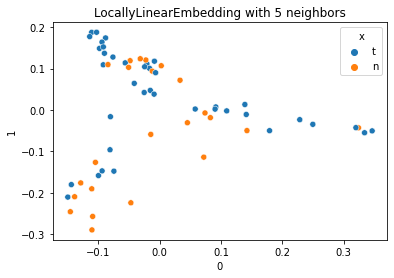

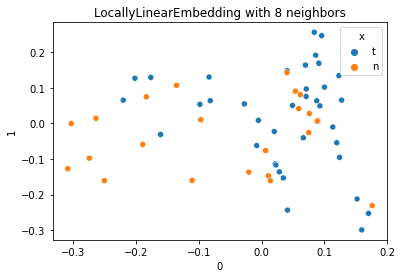

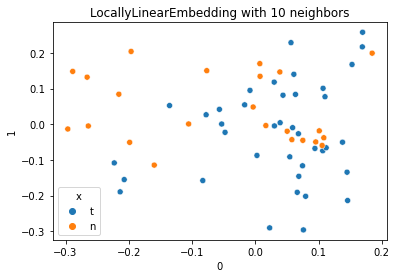

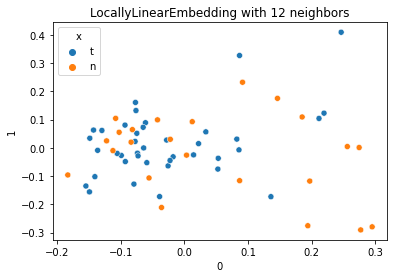

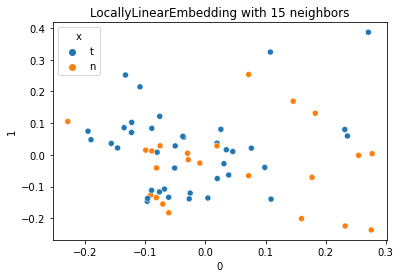

In [161]:
# We take normalized dataset
list = [3,5,8,10,12,15]

for i in list:
    lle = LocallyLinearEmbedding(n_neighbors = i)
    alon_proj_lle = lle.fit_transform(alon_scaled)
    alon_proj_lle = pd.DataFrame(alon_proj_lle)
    alon_proj_lle['x'] = alon_class['x']
    fig, ax = plt.subplots()
    sns.scatterplot(x = alon_proj_lle[0], y=alon_proj_lle[1],hue = alon_proj_lle['x'])
    ax.set_title('LocallyLinearEmbedding with '+ str(i) +' neighbors')


## 5- TSNE

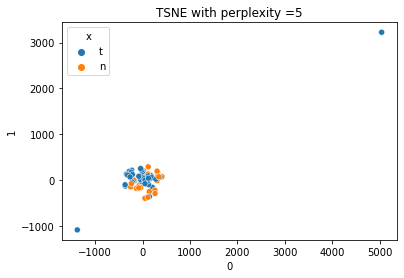

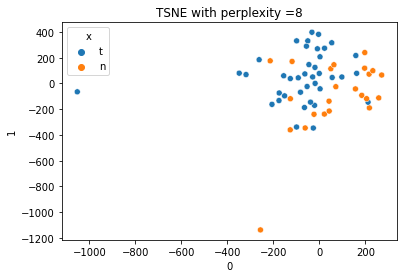

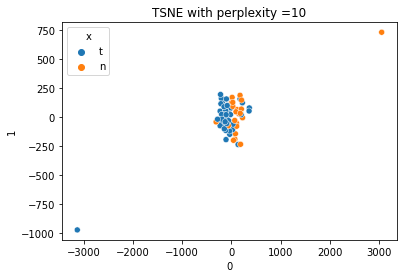

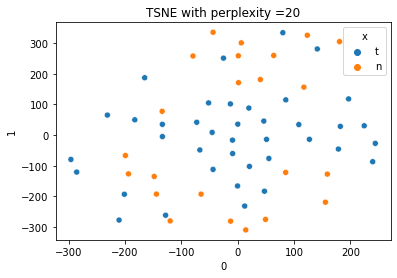

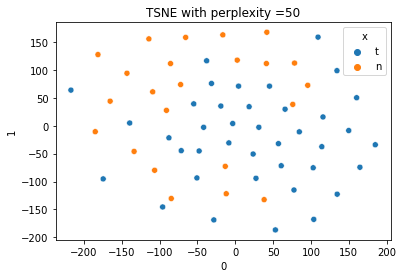

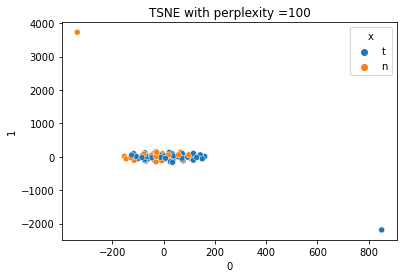

In [165]:
# We take normalized dataset
list = [5,8,10,20,50,100]

for i in list:
    tsne = TSNE(n_components=2,perplexity = i)
    alon_proj_tsne = tsne.fit_transform(alon_scaled)
    alon_proj_tsne = pd.DataFrame(alon_proj_tsne)
    alon_proj_tsne['x'] = alon_class['x']
    fig, ax = plt.subplots()
    sns.scatterplot(x = alon_proj_tsne[0], y=alon_proj_tsne[1],hue = alon_proj_tsne['x'])
    ax.set_title('TSNE with perplexity ='+str(i))